### Import

In [2]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Download and prepare the CIFAR10 dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_labels = np.expand_dims(train_labels,-1)
test_labels = np.expand_dims(test_labels,-1)

### Resize to 32 to match the CIFAR10 data

In [5]:
train_images_resized = []
test_images_resized = []
imresized = np.zeros((32,32))
for i in range(train_images.shape[0]):
    imarray = train_images[i,:,:]
    im = Image.fromarray(imarray)
    im = im.resize((32,32))
    imresized = np.array(im)
    imresized = imresized - np.min(imresized)
    imresized = imresized / np.max(imresized)
    train_images_resized.append(imresized)
for i in range(test_images.shape[0]):
    imarray = test_images[i,:,:]
    im = Image.fromarray(imarray)
    im = im.resize((32,32))
    imresized = np.array(im)
    imresized = imresized - np.min(imresized)
    imresized = imresized / np.max(imresized)
    test_images_resized.append(imresized)
test_images = np.array(test_images_resized) / 255.0
train_images = np.array(train_images_resized) / 255.0

### Sanity Check of the Data

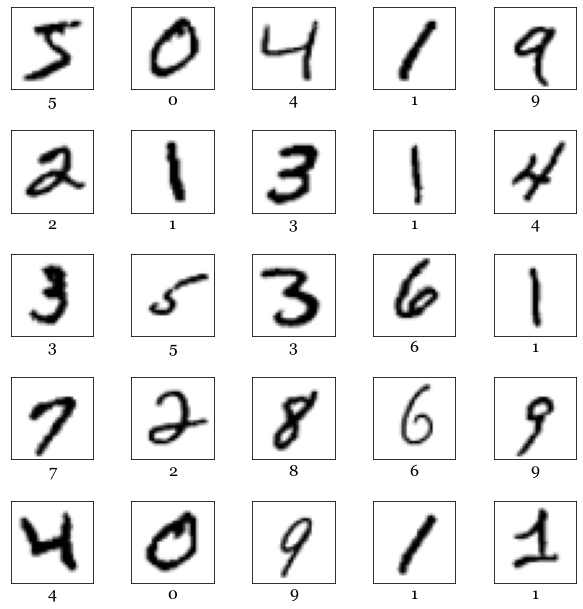

In [6]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(1-train_images[i],cmap='gray')
    plt.xlabel(class_names[train_labels[i][0]],**csfont,fontsize=16)

### Create the network

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='tanh', input_shape=(32,32,1)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, (5,5), activation='tanh'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, (5,5), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

### Optimizer

In [8]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.000025,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam');

### Compile and train the model

In [9]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Fit the Model

In [10]:
history = model.fit(train_images, train_labels, epochs=40, 
                    validation_data=(test_images, test_labels))

Epoch 1/40
1875/1875 [==============================] - 18s 9ms/step - loss: 1.9583 - accuracy: 0.4235 - val_loss: 1.2016 - val_accuracy: 0.6726
Epoch 2/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9027 - accuracy: 0.7438 - val_loss: 0.7042 - val_accuracy: 0.7931
Epoch 3/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6385 - accuracy: 0.8155 - val_loss: 0.5543 - val_accuracy: 0.8383
Epoch 4/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5306 - accuracy: 0.8440 - val_loss: 0.4765 - val_accuracy: 0.8606
Epoch 5/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4675 - accuracy: 0.8610 - val_loss: 0.4255 - val_accuracy: 0.8740
Epoch 6/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4231 - accuracy: 0.8743 - val_loss: 0.3887 - val_accuracy: 0.8834
Epoch 7/40
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3894 - accuracy: 0.8838 - val_loss: 0.3590 - val_ac

### Predict

In [11]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)
y_pred = np.expand_dims(y_pred,-1)
C = confusion_matrix(test_labels,y_pred);

### Plot the loss and accuracy over training epochs

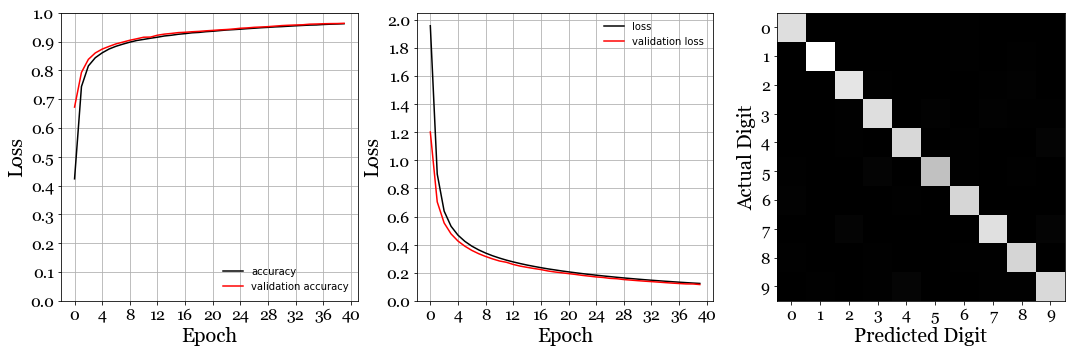

In [16]:
plt.figure(figsize=(14,4))
plt.subplots_adjust(left=0.0,bottom=0, right=1.0, top=1, wspace=0.2, hspace=0)
plt.subplot(1,3,1);
plt.plot(history.history['accuracy'], c='k',label='accuracy')
plt.plot(history.history['val_accuracy'],c='r', label = 'validation accuracy')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,1,11),np.round(np.linspace(0,1,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,40,11),np.linspace(0,40,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='lower right',frameon=False);
plt.subplot(1,3,2);
plt.plot(history.history['loss'], c='k', label='loss')
plt.plot(history.history['val_loss'], c='r',label = 'validation loss')
plt.xlabel('Epoch',**csfont,fontsize=20)
plt.ylabel('Loss',**csfont,fontsize=20)
plt.yticks(np.linspace(0,2,11),np.round(np.linspace(0,2,11),2).astype(float),**csfont,fontsize=16)
plt.xticks(np.linspace(0,40,11),np.linspace(0,40,11).astype(int),**csfont,fontsize=16)
plt.grid()
plt.legend(loc='upper right',frameon=False);
plt.subplot(1,3,3);
plt.imshow(C,cmap='gray');
plt.xlabel('Predicted Digit',**csfont,fontsize=20);
plt.ylabel('Actual Digit',**csfont,fontsize=20);
plt.xticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.yticks(np.linspace(0,9,10),np.linspace(0,9,10).astype(int),**csfont,fontsize=16);
plt.savefig('../../assets/matplotlib/27-lenet-mnist.png', dpi=300,bbox_inches="tight")    